<a href="https://colab.research.google.com/github/luuvu1396/DA_CODEgym/blob/main/Case_study_(DAP2304R1)_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **17. Xây dựng mô hình dự báo giá nhà trên/m2 của bài toán mua bán đất Quận Nam Từ Liêm**



# 1: KHAI THÁC DỮ LIỆU
1.1: Đọc file dữ liệu

In [24]:
# import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
data = pd.read_csv("/content/LandTrading.csv",index_col =	"Unnamed: 0" )
data.head()

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã


In [26]:
data.columns

Index(['dien_tich', 'huong_ban_cong', 'phong_ngu', 'id_thanh_pho',
       'ten_thanh_pho', 'id_quan', 'ten_quan', 'so_tang', 'mat_tien',
       'noi_that', 'huong_nha', 'so_do', 'lat', 'long', 'gia', 'gia_m2',
       'du_an', 'project_name', 'id_duong', 'ten_duong', 'do_rong_duong',
       'do_rong_duong_ml', 'id_phuong', 'ten_phuong'],
      dtype='object')

1.2: Lấy dữ liệu Quận Nam Từ Liêm
(ID:5e5501caeb80a7245175de33)

In [27]:
data_NTL = data[data['id_quan'] == "5e5501caeb80a7245175de33"]
data_NTL.head()

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
23806,88.0,NaN,NaN,5e5501caeb80a7245175dddb,Hà Nội,5e5501caeb80a7245175de33,Nam Từ Liêm,NaN,NaN,NaN,...,68.0,0.772727,NaN,NaN,5e958eeb208d0d6d764900e7,Trần Hữu Dực,NaN,NaN,5e5501cbeb80a7245175e1aa,Xuân Phương
23807,58.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,NaN,...,4700.0,81.034483,NaN,NaN,5e958eeb208d0d6d76490090,Đường Lê Quang Đạo,NaN,NaN,5e5501cbeb80a7245175e1b0,Phường Phú Đô
23808,55.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,NaN,...,5700.0,103.636364,NaN,NaN,5e958eeb208d0d6d76490097,Đường Mễ Trì Hạ,NaN,Ngõ 1 ô tô,5e5501cbeb80a7245175e1af,Phường Mễ Trì
23809,52.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,NaN,...,260.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23810,60.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de33,Quận Nam Từ Liêm,NaN,NaN,NaN,...,3850.0,64.166667,NaN,NaN,5e958eeb208d0d6d764900c2,Đường Phú Đô,NaN,NaN,5e5501cbeb80a7245175e1b0,Phường Phú Đô


In [28]:
data_NTL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 23806 to 24843
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         1023 non-null   float64
 1   huong_ban_cong    4 non-null      object 
 2   phong_ngu         79 non-null     float64
 3   id_thanh_pho      1038 non-null   object 
 4   ten_thanh_pho     1038 non-null   object 
 5   id_quan           1038 non-null   object 
 6   ten_quan          1038 non-null   object 
 7   so_tang           90 non-null     float64
 8   mat_tien          424 non-null    float64
 9   noi_that          7 non-null      object 
 10  huong_nha         296 non-null    object 
 11  so_do             647 non-null    object 
 12  lat               1036 non-null   float64
 13  long              1036 non-null   float64
 14  gia               972 non-null    float64
 15  gia_m2            965 non-null    float64
 16  du_an             2 non-null      obj

1.3: Lấy các đặc trưng có thể ảnh hưởng đến giá mô hình dự báo giá nhà trên/m2

In [29]:
target = data_NTL[['dien_tich','mat_tien','so_do','lat', 'long', 'do_rong_duong_ml','id_duong','gia_m2']]
target.head()

,dien_tich,mat_tien,so_do,lat,long,do_rong_duong_ml,id_duong,gia_m2
23806,88.0,NaN,NaN,NaN,NaN,NaN,5e958eeb208d0d6d764900e7,0.772727
23807,58.0,NaN,NaN,21.011385,105.771917,NaN,5e958eeb208d0d6d76490090,81.034483
23808,55.0,NaN,NaN,21.013532,105.781742,Ngõ 1 ô tô,5e958eeb208d0d6d76490097,103.636364
23809,52.0,NaN,Sổ đỏ,21.003461,105.770329,NaN,NaN,5.000000
23810,60.0,NaN,Sổ đỏ,21.012433,105.767394,NaN,5e958eeb208d0d6d764900c2,64.166667


In [30]:
target.describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,1023.000000,424.000000,1036.000000,1036.000000,965.000000
mean,193.787615,8.644906,21.010621,105.761321,180.700938
std,1086.649496,26.333163,0.323103,0.027579,1955.038910
min,7.000000,1.000000,10.636833,105.726315,0.000110
25%,43.000000,4.000000,21.008621,105.744342,47.115385
50%,56.000000,4.700000,21.023206,105.764901,63.953488
75%,81.450000,6.000000,21.031459,105.771917,84.651163
max,16500.000000,465.000000,21.058636,106.483634,58571.428571


# 2: Xử lý dữ liệu

In [31]:
# User-defined function
# Xây dựng hàm biến đổi của cột sổ đỏ
def conver_polity(_str):
  """
  _str: Đầu vào của cột so_do
  return:
  1: có số hồng/sổ đỏ
  0: không có sổ
  """
  if pd.isna(_str):
    return 0
  return 1

# Xây dựng hàm biến đổi của cột độ rộng đường ML
def convert_street_width(_str):
  """
  _str: Đầu vào của cột do_rong_duong_ml
  Ngõ ngách/empty : 0
  Ngõ 1 ô tô: 1
  Ngõ 2 ô tô tránh: 2
  Ngõ 3 ô tô tránh: 3
  Ngõ 4 ô tô tránh: 4
  Ngõ 4 ô tô trở lên: 5
  """
  List = ['Ngõ ngách','Ngõ 1 ô tô','Ngõ 2 ô tô tránh','Ngõ 3 ô tô tránh', 'Ngõ 4 ô tô trở lên', 'Ngõ 4 ô tô tránh']
  if pd.isna(_str):
    return 0
  elif (_str in List):
    return List.index(_str)

# Xử lý ngoại lai bằng IQR
def get_Q1_Q3(values):
  q1 = np.quantile(values, 0.25)
  q3 = np.quantile(values, 0.75)
  IQR = q3 - q1
  min_value = q1 - 1.5 * IQR
  max_value = q3 + 1.5 * IQR
  return min_value, max_value

# Đánh trọng số
# def argument (values):
#   if pd.isna(values):
#     return 0.2
#   return 0.8




In [32]:
# Xử lý cột so_do
target["so_do"] = target["so_do"].apply(lambda x : conver_polity(x))
#Xử lý độ rộng đường ML
target["do_rong_duong_ml"] = target["do_rong_duong_ml"].apply(lambda x : convert_street_width(x))
# gán trọng số
# target['argument'] = target['mat_tien'].apply(lambda x : argument(x))
# target

<ipython-input-32-76ff3f5c9959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["so_do"] = target["so_do"].apply(lambda x : conver_polity(x))
<ipython-input-32-76ff3f5c9959>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["do_rong_duong_ml"] = target["do_rong_duong_ml"].apply(lambda x : convert_street_width(x))


In [33]:
target.isna().sum()

dien_tich            15
mat_tien            614
so_do                 0
lat                   2
long                  2
do_rong_duong_ml      0
id_duong             59
gia_m2               73
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

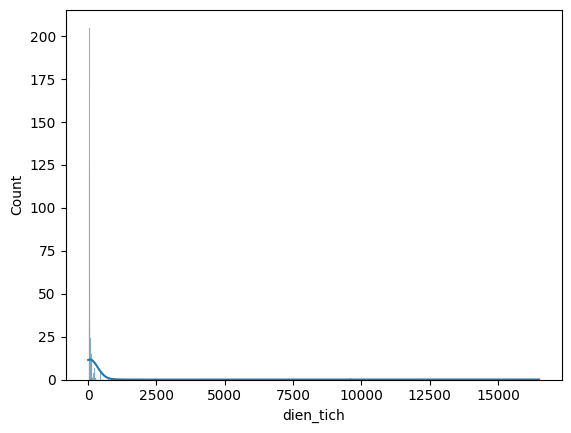

In [34]:
sns.histplot(data = target, x = 'dien_tich', bins = 2000, kde = True)
plt.show

In [35]:
#điền "median" của Mặt tiền group theo ID đường (cùng trên 1 đoạn đường có mặt tiền rộng gần bằng nhau)
target['mat_tien'] = target.groupby(by="id_duong",group_keys= False)["mat_tien"].apply(lambda x : x.fillna(x.median()))
#Diện tích và mặt tiền có tương quan với nhau
#Chia Diện tích = 10 phần bằng nhau
result = pd.qcut(target["dien_tich"],10,labels=[0,1,2,3,4,5,6,7,8,9])
target["group_cut"] = result
#điền "median" Mặt tiền group theo từng đoạn điện tích đã chia
target['mat_tien'] = target.groupby(by="group_cut",group_keys= False)["mat_tien"].apply(lambda x : x.fillna(x.median()))
target.isna().sum()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

dien_tich           15
mat_tien            15
so_do                0
lat                  2
long                 2
do_rong_duong_ml     0
id_duong            59
gia_m2              73
group_cut           15
dtype: int64

In [36]:
# loại bỏ các giá trị NAN
target.dropna(inplace = True)
len(target)

<ipython-input-36-f562d587ca44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.dropna(inplace = True)


902

In [37]:
# Xử lý ngoại lại
min_dien_tich, max_dien_tich = get_Q1_Q3(target["dien_tich"])
min_mat_tien, max_mat_tien = get_Q1_Q3(target["mat_tien"])
min_gia_m2, max_gia_m2 = get_Q1_Q3(target["gia_m2"])
logic = ((target["dien_tich"] >= min_dien_tich) & (target["dien_tich"] <= max_dien_tich) &
         (target["mat_tien"] >= min_mat_tien) & (target["mat_tien"] <= max_mat_tien) &
         (target["gia_m2"] >= min_gia_m2) & (target["gia_m2"] <= max_gia_m2))
clean = target[logic]
len(clean)

696

<ipython-input-38-1bc324aea1a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean.corr(), annot = True, cmap = plt.cm.Reds)


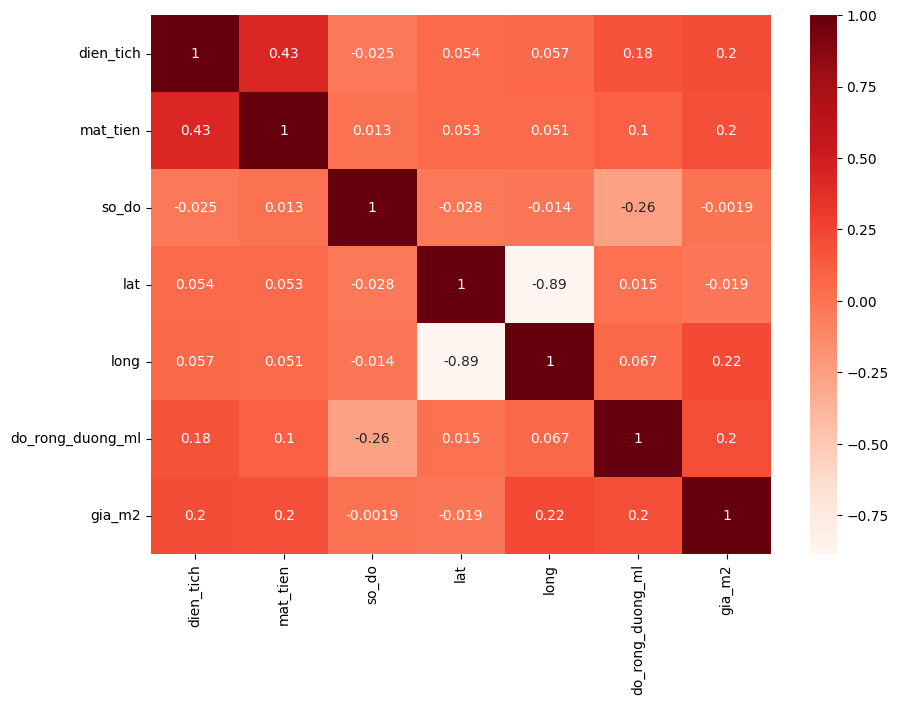

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(clean.corr(), annot = True, cmap = plt.cm.Reds)
plt.show()

In [39]:
# Điền trọng số sau khi loại bỏ outliner
# np.corrcoef(clean["gia_m2"],clean["mat_tien"])
# def funtion(values):
#  argument1 = np.sqrt(values * 0.197697) ??
#  return argument1

# clean["argument"] = clean["argument"].apply(lambda x : funtion(x))
# clean

In [40]:
X_value = clean[['dien_tich','mat_tien','so_do','lat', 'long', 'do_rong_duong_ml','gia_m2']]
X_value

,dien_tich,mat_tien,so_do,lat,long,do_rong_duong_ml,gia_m2
23807,58.0,4.00,0,21.011385,105.771917,0,81.034483
23808,55.0,5.00,0,21.013532,105.781742,1,103.636364
23810,60.0,5.00,1,21.012433,105.767394,0,64.166667
23812,60.0,5.00,0,21.008863,105.765870,0,64.166667
23814,55.0,4.15,1,21.022507,105.742878,0,43.636364
...,...,...,...,...,...,...,...
24835,54.0,4.00,1,21.013597,105.758579,1,75.000000
24836,31.0,3.70,1,21.034022,105.738624,0,75.806452
24837,125.0,7.00,0,21.032323,105.765090,0,116.000000
24838,107.0,7.00,0,21.029504,105.769080,2,93.457944


In [18]:
# from sklearn.preprocessing import MinMaxScaler
# # Normalization
# from sklearn import preprocessing
# # x = df.values #returns a numpy array
# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(X_value)
# df_s = pd.DataFrame(x_scaled, columns= X_value.columns)
# df_s

,dien_tich,mat_tien,so_do,lat,long,do_rong_duong_ml,gia_m2
0,0.414634,0.222222,0.0,0.995921,0.060214,0.0,0.578817
1,0.390244,0.444444,0.0,0.996127,0.073189,0.2,0.740259
2,0.430894,0.444444,1.0,0.996021,0.054243,0.0,0.458333
3,0.430894,0.444444,0.0,0.995679,0.052231,0.0,0.458333
4,0.390244,0.255556,1.0,0.996989,0.021871,0.0,0.311688
...,...,...,...,...,...,...,...
691,0.382114,0.222222,1.0,0.996133,0.042603,0.2,0.535714
692,0.195122,0.155556,1.0,0.998094,0.016253,0.0,0.541474
693,0.959350,0.888889,0.0,0.997931,0.051200,0.0,0.828571
694,0.813008,0.888889,0.0,0.997660,0.056468,0.4,0.667556


# 3: Xây dựng mô hình dự báo giá nhà trên/m2

In [43]:
from sklearn.model_selection import train_test_split
# Split dữ liệu
X = X_value[['dien_tich','mat_tien','so_do','lat', 'long', 'do_rong_duong_ml']]
y = X_value['gia_m2']
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=1)

In [59]:
# Chọn mô hình
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

model_0 = linear_model.LinearRegression()
model_1 = DecisionTreeRegressor(random_state=1)
model_2 = RandomForestRegressor(random_state=1)


list_model = [model_0,model_1,model_2]
best_loss = 1000000000
best_model_index = 0

total_model = []
for idx, model in enumerate(list_model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_absolute_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  score_model = model.score(X_train, y_train)
  total_model.append((idx,mse,mape,score_model ))
  if mape < best_loss:
    best_model_index = idx
    best_loss = mape
print('Best model:',list_model[best_model_index])
total_model = pd.DataFrame(total_model,index = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"], columns= [ "index","mse","mape","score_model"],)
total_model

Best model: DecisionTreeRegressor(random_state=1)


,index,mse,mape,score_model
LinearRegression,0,14.165871,2802.320217,0.236894
DecisionTreeRegressor,1,15.784302,2096.042715,0.955158
RandomForestRegressor,2,13.332817,2604.801473,0.860823


In [45]:
#finetune model
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=3, max_features=None, max_leaf_nodes=9,
                      n_estimators=50)
